In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt 

In [18]:
#Load the dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

In [24]:
# Define the model
model = keras.Sequential([keras.layers.Conv2D(64,(3,3), activation='relu',input_shape=(28, 28,1)),
                          keras.layers.MaxPooling2D(2,2),                 
                          keras.layers.Flatten(),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')])


In [25]:
# Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [26]:
# Train the model
model.fit(train_images, train_labels, epochs=10) 
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

                                                                    

Epoch 1/10
1875/1875 [==============================] - 46s 23ms/step - loss: 0.3744 - accuracy: 0.8664
Epoch 2/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2505 - accuracy: 0.9078
Epoch 3/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.2059 - accuracy: 0.9246
Epoch 4/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1719 - accuracy: 0.9364
Epoch 5/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1427 - accuracy: 0.9474
Epoch 6/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.1191 - accuracy: 0.9554
Epoch 7/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0992 - accuracy: 0.9630
Epoch 8/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0829 - accuracy: 0.9694
Epoch 9/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0693 - accuracy: 0.9744
Epoch 10/10
313/313 [==============================] - 3s 7ms/st

In [27]:
# Make predictions
predictions = model.predict(test_images)
predicted_labels =np.argmax(predictions, axis=1)

313/313 [==============================] - 3s 8ms/step


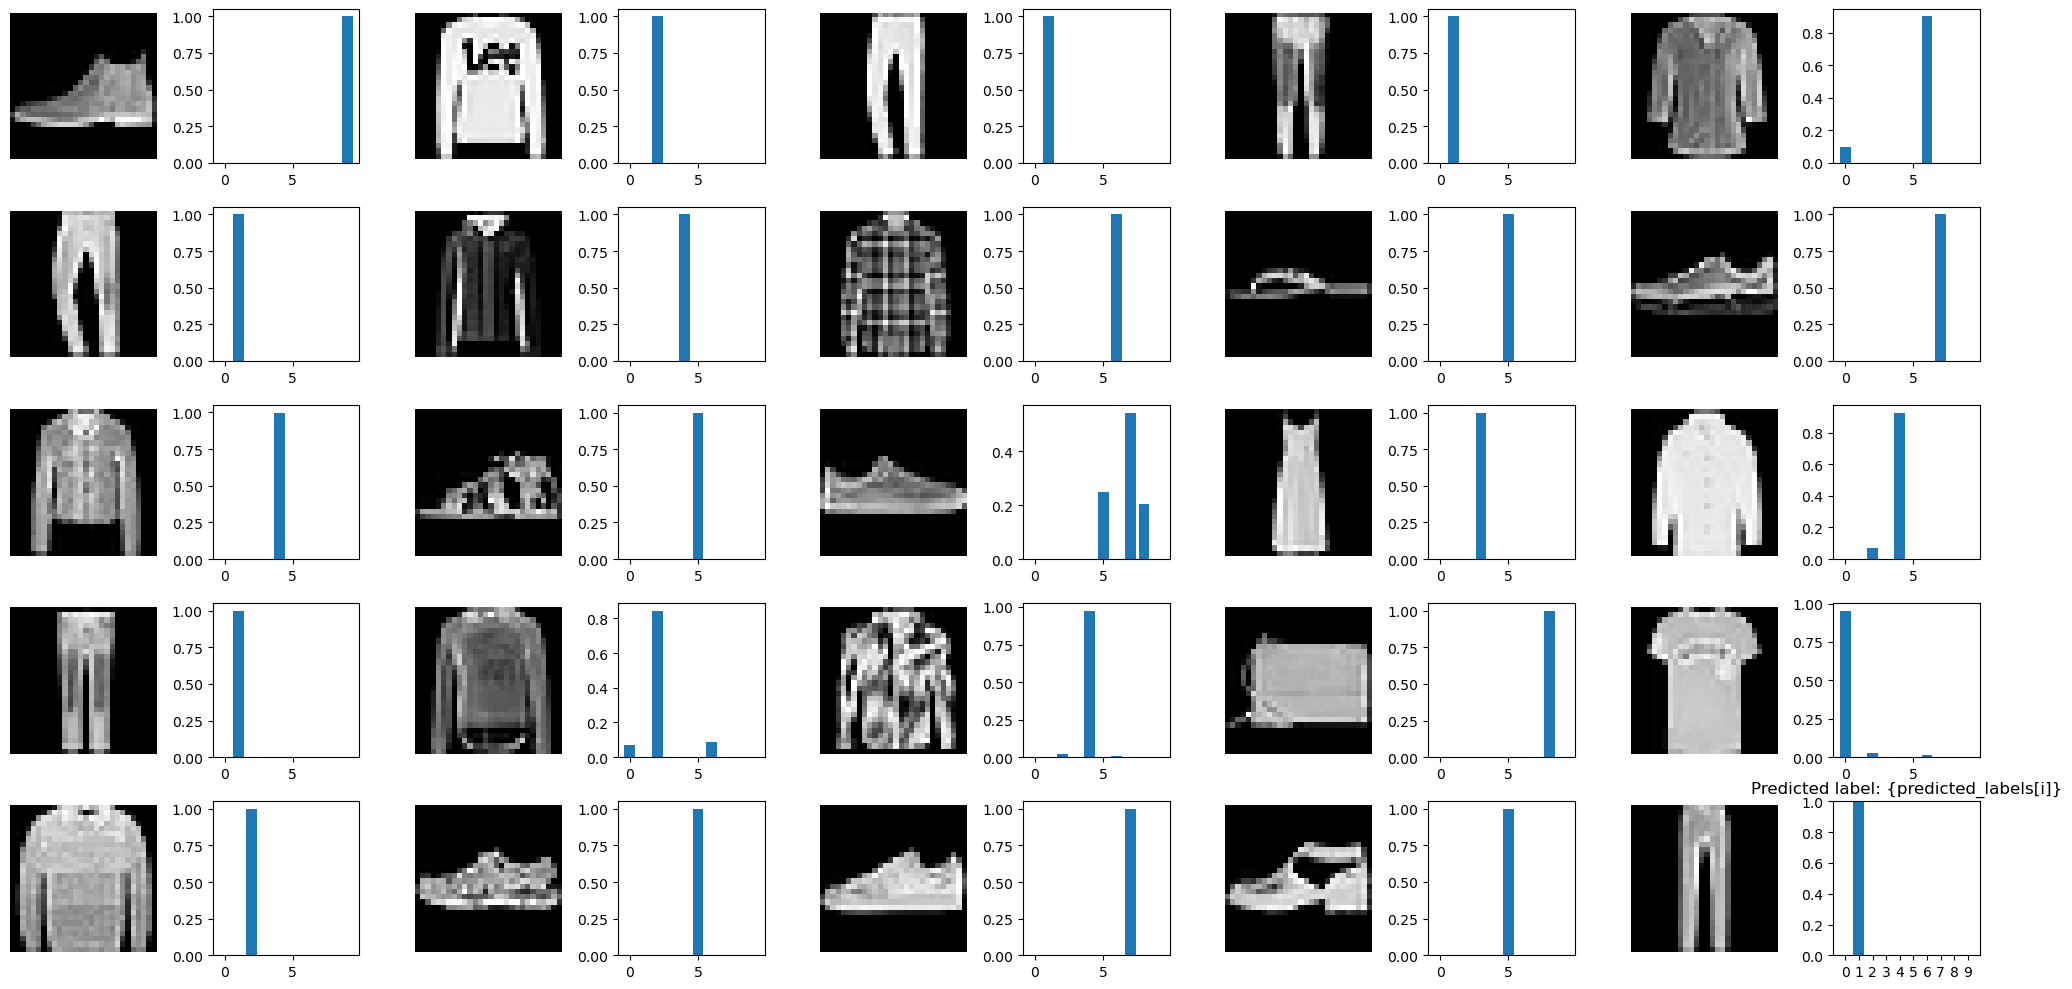

In [29]:
# Show some example images and their predicted labels
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 *num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1) 
    plt.imshow(test_images[i],cmap='gray')
    plt.axis('off')
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plt.bar(range(10),
predictions[i]) 
plt.xticks(range(10))
plt.ylim([0, 1])
plt.tight_layout()
plt.title("Predicted label: {predicted_labels[i]}")
plt.show()

